In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv(r'C:\Users\Mr. Amlan chatterjee\Documents\AB\M2_PISABAZAR_BANKING FRAUD _ANALYSIS\dataset.csv')
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
# Dropping unnecessary columns
data.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

In [4]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
data.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [5]:
# Splitting the dataset into features and target
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Model

In [6]:
# Model training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)


print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nRandom Forest Classification Report:\n", report)
print("\nRandom Forest Confusion Matrix:\n", cm_rf)

Model Accuracy: 83.56%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      3527
           1       0.82      0.86      0.84      5874
           2       0.86      0.83      0.84     10599

    accuracy                           0.84     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.84      0.84     20000


Random Forest Confusion Matrix:
 [[2842   11  674]
 [  27 5072  775]
 [ 666 1136 8797]]


## XGBoost Model

In [7]:
# XGBoost model training
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions for XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluation for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")
print("\nXGBoost Classification Report:\n", report_xgb)
print("\nXGBoost Confusion Matrix:\n", cm_xgb)

XGBoost Model Accuracy: 73.98%

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67      3527
           1       0.76      0.69      0.72      5874
           2       0.78      0.77      0.78     10599

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.74      0.74      0.74     20000


XGBoost Confusion Matrix:
 [[2533   69  925]
 [ 367 4051 1456]
 [1162 1224 8213]]


## Gradient Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_classifier.predict(X_test)


# Accuracy score
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

print(f"Gradient Boosting Model Accuracy: {accuracy_gbm * 100:.2f}%")
print("\nGradient Boosting Classification Report:\n", report_gbm)
print("\nGradient Boost Confusion Matrix:\n", cm_gbm)

Gradient Boosting Model Accuracy: 71.73%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64      3527
           1       0.75      0.65      0.70      5874
           2       0.75      0.76      0.75     10599

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000


Gradient Boost Confusion Matrix:
 [[2482   41 1004]
 [ 378 3815 1681]
 [1312 1239 8048]]


## KNN Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Gradient Boosting Model Accuracy: {accuracy_knn * 100:.2f}%")
print("\nKNN Classification Report:\n", report_knn)
print("\nKNN Confusion Matrix:\n", cm_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Gradient Boosting Model Accuracy: 79.33%

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      3527
           1       0.78      0.83      0.80      5874
           2       0.82      0.78      0.80     10599

    accuracy                           0.79     20000
   macro avg       0.78      0.79      0.78     20000
weighted avg       0.79      0.79      0.79     20000


KNN Confusion Matrix:
 [[2670   26  831]
 [  33 4886  955]
 [ 923 1367 8309]]


## Cat Boost

In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train the CatBoost model
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_classifier.predict(X_test)

# Accuracy score
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)  # Corrected variable name
report_catboost = classification_report(y_test, y_pred_catboost)
cm_catb = confusion_matrix(y_test, y_pred_catboost)

print(f"CatBoost Model Accuracy: {accuracy_catboost * 100:.2f}%")  # Corrected variable name
print("\nCatBoost Classification Report:\n", report_catboost)
print("\nCat Boost Confusion Matrix:\n", cm_catb)

CatBoost Model Accuracy: 74.98%

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      3527
           1       0.76      0.72      0.74      5874
           2       0.78      0.79      0.78     10599

    accuracy                           0.75     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.75      0.75      0.75     20000


Cat Boost Confusion Matrix:
 [[2436   71 1020]
 [ 259 4218 1397]
 [ 972 1284 8343]]


## Stacked Model

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define base learners
base_learners = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Meta-model
meta_model = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Accuracy score
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%")

# Classification report
report_stacking = classification_report(y_test, y_pred_stacking)
print("\nStacking Classifier Classification Report:\n", report_stacking)

# Confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nStacking Classifier Confusion Matrix:\n", cm_stacking)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Accuracy: 83.45%

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      3527
           1       0.82      0.85      0.84      5874
           2       0.85      0.84      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000


Stacking Classifier Confusion Matrix:
 [[2810    1  716]
 [   4 4989  881]
 [ 626 1081 8892]]


## ROC Curves

C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\1609017439.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'ROC_Curve_for_class_{class_names[i]}.png', dpi=500, layout='tight')


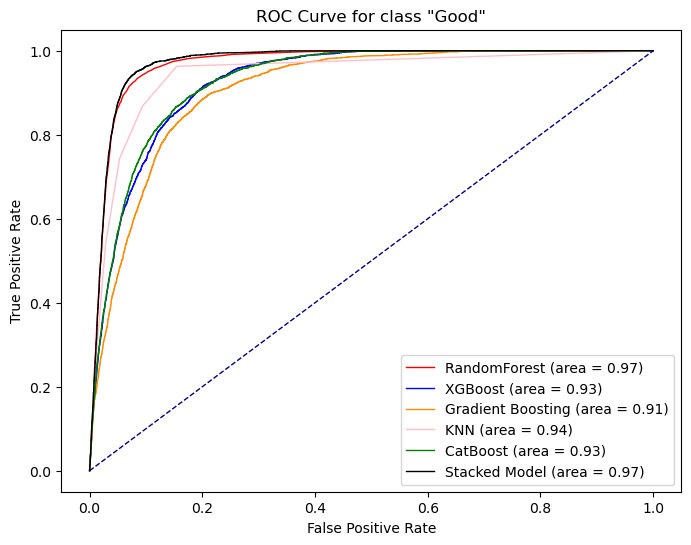

C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\1609017439.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'ROC_Curve_for_class_{class_names[i]}.png', dpi=500, layout='tight')


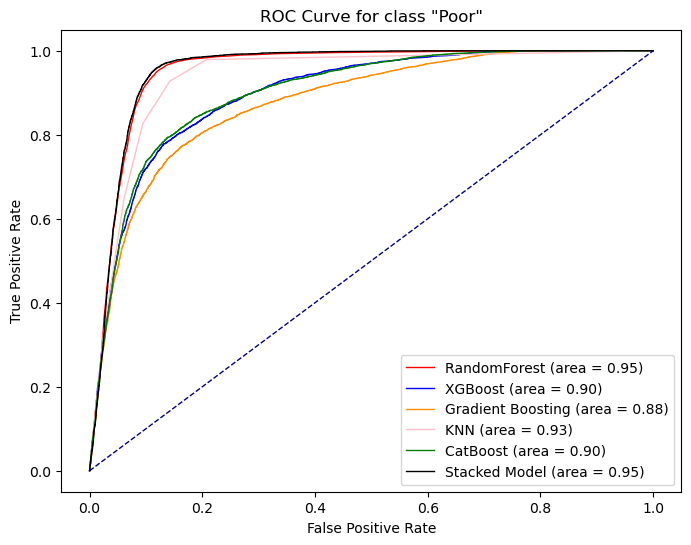

C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\1609017439.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'ROC_Curve_for_class_{class_names[i]}.png', dpi=500, layout='tight')


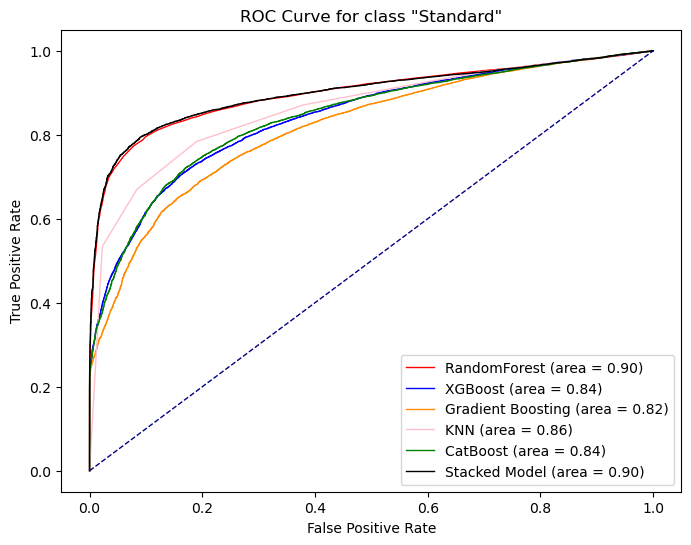

In [40]:
# ROC Curve for multiclass classification using both RandomForest and XGBoost (separate plots for each class)
class_names = label_encoders['Credit_Score'].classes_

# Binarize the true labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=range(len(class_names)))

# Get the predicted probabilities for both RandomForest and XGBoost
probs_rf = rf_classifier.predict_proba(X_test)
probs_xgb = xgb_classifier.predict_proba(X_test)
probs_gbm = gbm_classifier.predict_proba(X_test)
probs_knn = knn_classifier.predict_proba(X_test)
probs_catboost = catboost_classifier.predict_proba(X_test)
probs_stack = stacking_classifier.predict_proba(X_test)


# Create separate plots for each class
for i in range(len(class_names)):
    # Compute ROC for RandomForest
    fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized[:, i], probs_rf[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    # Compute ROC for XGBoost
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binarized[:, i], probs_xgb[:, i])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
    
    # Compute ROC for Gradient Boosting
    fpr_gbm, tpr_gbm, _ = roc_curve(y_test_binarized[:, i], probs_gbm[:, i])
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    
    # Compute ROC for KNN
    fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized[:, i], probs_knn[:, i])
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    
    # Compute ROC for CatBoost
    fpr_catb, tpr_catb, _ = roc_curve(y_test_binarized[:, i], probs_catboost[:, i])
    roc_auc_catb = auc(fpr_catb, tpr_catb)
    
    # Compute ROC for Stacking
    fpr_stack, tpr_stack, _ = roc_curve(y_test_binarized[:, i], probs_stack[:, i])
    roc_auc_stack = auc(fpr_stack, tpr_stack)
    
    # Create a plot for this class
    plt.figure(figsize=(8, 6))
    
    # Plot all ROC curves
    plt.plot(fpr_rf, tpr_rf, color='red', lw=1, label=f'RandomForest (area = {roc_auc_rf:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=1, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
    plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=1, label=f'Gradient Boosting (area = {roc_auc_gbm:.2f})')
    plt.plot(fpr_knn, tpr_knn, color='pink', lw=1, label=f'KNN (area = {roc_auc_knn:.2f})')
    plt.plot(fpr_catb, tpr_catb, color='green', lw=1, label=f'CatBoost (area = {roc_auc_catb:.2f})')
    plt.plot(fpr_stack, tpr_stack, color='black', lw=1, label=f'Stacked Model (area = {roc_auc_stack:.2f})')
    
    # Plot diagonal line (no skill)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class "{class_names[i]}"')
    
    # Add legend
    plt.legend(loc='lower right')
    
    #Save the plot
    plt.savefig(f'ROC_Curve_for_class_{class_names[i]}.png', dpi=500, layout='tight')
    
    # Show plot
    plt.show()


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\2818646103.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Confusion_Matrix.png", dpi = 1000, layout = 'tight')


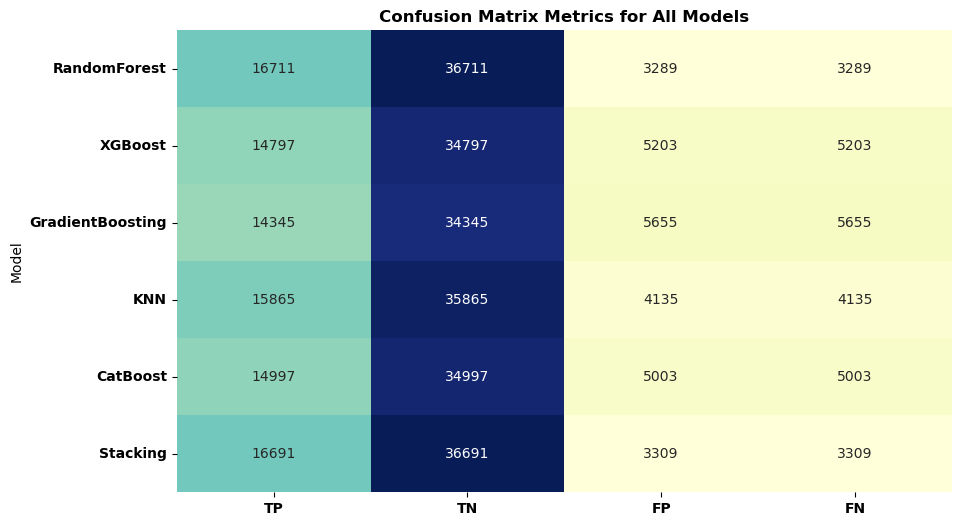

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume `confusion_matrices` is a dictionary of confusion matrices for each model
# Example: {'RandomForest': cm_rf, 'XGBoost': cm_xgb, ...}
confusion_matrices = {
    'RandomForest': cm_rf,
    'XGBoost': cm_xgb,
    'GradientBoosting': cm_gbm,
    'KNN': cm_knn,
    'CatBoost': cm_catboost,
    'Stacking': cm_stack
}

models = ['RandomForest', 'XGBoost', 'GradientBoosting', 'KNN', 'CatBoost', 'Stacking']

heatmap_data = []

for model_name, cm in confusion_matrices.items():
    tp = cm.diagonal()  # True Positives for each class
    fp = cm.sum(axis=0) - tp  # False Positives for each class (sum of columns - diagonal)
    fn = cm.sum(axis=1) - tp  # False Negatives for each class (sum of rows - diagonal)
    tn = cm.sum() - (tp + fp + fn)  # True Negatives for each class (total sum - TP - FP - FN)

    # Aggregated values for all classes
    total_tp = tp.sum()
    total_tn = tn.sum()
    total_fp = fp.sum()
    total_fn = fn.sum()

    heatmap_data.append([model_name, total_tp, total_tn, total_fp, total_fn])

# Create a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, columns=['Model', 'TP', 'TN', 'FP', 'FN'])
heatmap_df.set_index('Model', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', cbar=False, fmt='d')
plt.title('Confusion Matrix Metrics for All Models', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig("Confusion_Matrix.png", dpi = 1000, layout = 'tight')
plt.show()


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\1709090072.py:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Performance_summary.png", dpi = 1000, layout = 'tight')


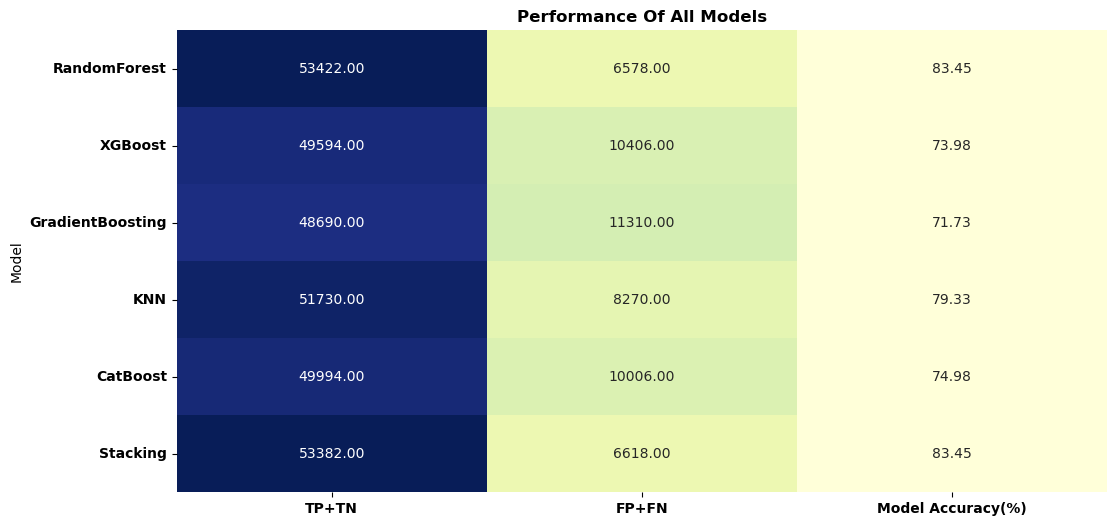

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Assume `confusion_matrices` is a dictionary of confusion matrices for each model
# Example: {'RandomForest': cm_rf, 'XGBoost': cm_xgb, ...}
confusion_matrices = {
    'RandomForest': cm_rf,
    'XGBoost': cm_xgb,
    'GradientBoosting': cm_gbm,
    'KNN': cm_knn,
    'CatBoost': cm_catboost,
    'Stacking': cm_stack
}

# Assume `y_test` is the true target values, and `y_pred_model` are the predicted values for each model
# Example: {'RandomForest': y_pred_rf, 'XGBoost': y_pred_xgb, ...}
model_predictions = {
    'RandomForest': y_pred,
    'XGBoost': y_pred_xgb,
    'GradientBoosting': y_pred_gbm,
    'KNN': y_pred_knn,
    'CatBoost': y_pred_catboost,
    'Stacking': y_pred_stacking
}

# List of models
models = ['RandomForest', 'XGBoost', 'GradientBoosting', 'KNN', 'CatBoost', 'Stacking']

heatmap_data = []

for model_name in models:
    cm = confusion_matrices[model_name]
    y_pred = model_predictions[model_name]
    
    # Compute confusion matrix elements
    tp = cm.diagonal()  # True Positives for each class
    fp = cm.sum(axis=0) - tp  # False Positives for each class (sum of columns - diagonal)
    fn = cm.sum(axis=1) - tp  # False Negatives for each class (sum of rows - diagonal)
    tn = cm.sum() - (tp + fp + fn)  # True Negatives for each class (total sum - TP - FP - FN)

    # Aggregated values for each model
    total_tp_tn = (tp + tn).sum()  # Sum of True Positives and True Negatives
    total_fp_fn = (fp + fn).sum()  # Sum of False Positives and False Negatives

    # Accuracy Calculation
    accuracy = 100*accuracy_score(y_test, y_pred)  # Model's accuracy based on predictions

    heatmap_data.append([model_name, total_tp_tn, total_fp_fn, accuracy])

# Create a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, columns=['Model', 'TP+TN', 'FP+FN', 'Model Accuracy(%)'])
heatmap_df.set_index('Model', inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f')
plt.title('Performance Of All Models', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig("Performance_summary.png", dpi = 1000, layout = 'tight')

plt.show()


C:\Users\Mr. Amlan chatterjee\AppData\Local\Temp\ipykernel_1804\103070674.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Classification_Report_summary.png", dpi = 1000, layout = 'tight')


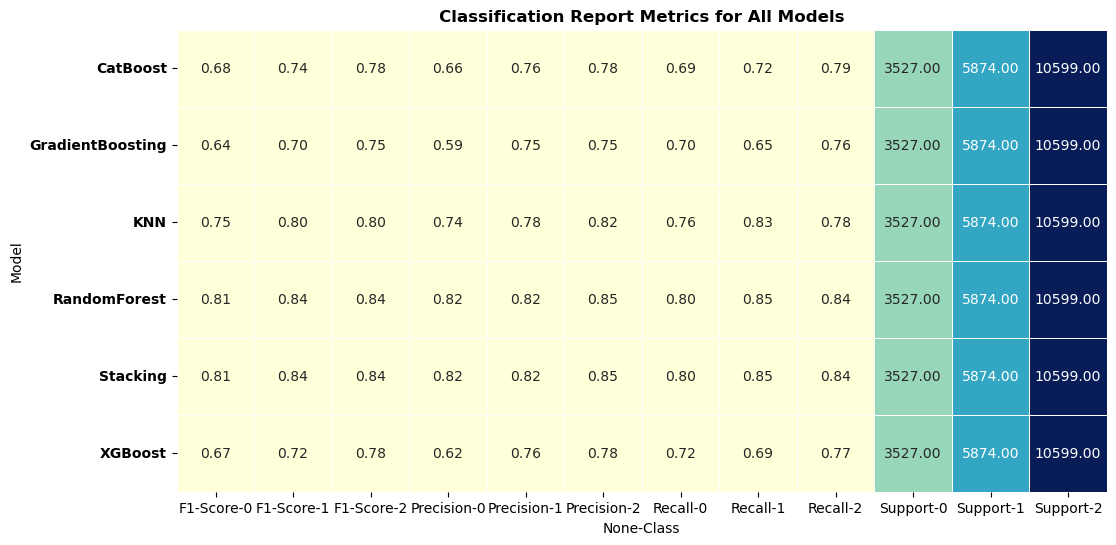

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assume classification reports for all models (as dictionaries)
classification_reports = {
    'RandomForest': classification_report(y_test, y_pred, output_dict=True),
    'XGBoost': classification_report(y_test, y_pred_xgb, output_dict=True),
    'GradientBoosting': classification_report(y_test, y_pred_gbm, output_dict=True),
    'KNN': classification_report(y_test, y_pred_knn, output_dict=True),
    'CatBoost': classification_report(y_test, y_pred_catboost, output_dict=True),
    'Stacking': classification_report(y_test, y_pred_stacking, output_dict=True)
}

# Prepare a list to collect all metrics for each model
metrics_data = []

# Loop through each model's classification report
for model_name, report in classification_reports.items():
    # Loop through each class
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        # Collect the precision, recall, f1-score, and support for each class
        row = {
            'Model': model_name,
            'Class': class_name,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1-score'],
            'Support': metrics['support']
        }
        metrics_data.append(row)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Pivot the table for heatmap visualization: rows = models, columns = metrics for each class
pivot_df = metrics_df.pivot_table(index='Model', columns=['Class'], values=['Precision', 'Recall', 'F1-Score', 'Support'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=0.5)
plt.title('Classification Report Metrics for All Models', fontweight='bold')

plt.yticks(fontweight='bold')

plt.savefig("Classification_Report_summary.png", dpi = 1000, layout = 'tight')

plt.show()
